In [2]:
import scipy.io as sio
import scipy.stats as stats
import copy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import odeint
from copy import deepcopy
#from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import seaborn as sns
import networkx as nx
from itertools import combinations
from itertools import permutations
from itertools import combinations_with_replacement
from scipy.spatial import distance
from numpy import array
# from numpy import count_nonzero
from numba import jit
from numpy import zeros
import random
import itertools
import collections

In [3]:
# '''Variables'''
# Ng = 5
# composition_length = 5

In [4]:
compotypes_dataset_dict = {}

'''size 20:'''
compotype_example_20_A = [1.07317073170732,0.173441734417344,0.371273712737127,0.398373983739837,0.474254742547426,
                          1.10569105691057,0.913279132791328,2.86449864498645,0.113821138211382,2.08401084010840,
                          0.219512195121951,0.409214092140921,1.28184281842818,0.130081300813008,0.222222222222222,
                          0.509485094850949,0.146341463414634,0.168021680216802,7.20867208672087,0.132791327913279]
compotype_example_20_B = [0.441860465116279,0.441860465116279,0.0348837209302326,0.0581395348837209,0.279069767441860,
                          0.325581395348837,0.0813953488372093,0.290697674418605,0.116279069767442,0.0116279069767442,
                          0.116279069767442,0.767441860465116,0.197674418604651,0,0.127906976744186,0.348837209302326,
                          16.0930232558140,0.104651162790698,0.0813953488372093,0.0813953488372093]
compotype_example_20_C = [0.104166666666667,0.0312500000000000,5.59375000000000,0.239583333333333,0.0416666666666667,
                          0.0104166666666667,0.0104166666666667,0,0.0416666666666667,0.114583333333333,0.0520833333333333,
                          0.0208333333333333,0.125000000000000,0.239583333333333,1.32291666666667,0.0104166666666667,
                          11.1770833333333,0.406250000000000,0.166666666666667,0.291666666666667]

# compotype_example_20_B = [0.0756811301715439,19.1099899091826,0.0645812310797175,0.0383451059535822,0.0615539858728557,
#                           0.0312815338042381,0.0332996972754793,0.0393541876892028,0.0383451059535822,0.0181634712411705,
#                           0.00807265388496468,0.0211907164480323,0.227043390514632,0.0201816347124117,0.0191725529767911,
#                           0.0292633703329970,0.0776992936427851,0.0312815338042381,0.0242179616548940,0.0312815338042381]
'''size 18'''
compotype_example_18_A = [0.156862745098039,10.3725490196078,0.294117647058824,0.215686274509804,0.509803921568627,
                          0.156862745098039,0.431372549019608,0.274509803921569,0.156862745098039,0.117647058823529,
                          0.117647058823529,0.0784313725490196,0.313725490196078,0.0980392156862745,1.45098039215686,
                          0.529411764705882,0.588235294117647,2.13725490196078]
compotype_example_18_B = [0.166666666666667,0.312500000000000,0.229166666666667,0.125000000000000,0.312500000000000,
                          0.833333333333333,12.2291666666667,0.229166666666667,0.937500000000000,0.0833333333333333,
                          0.854166666666667,0.312500000000000,0.208333333333333,0.125000000000000,0.166666666666667,
                          0.395833333333333,0.312500000000000,0.166666666666667]
compotype_example_18_C = [0.0434782608695652,0.206521739130435,0.108695652173913,0.630434782608696,0.239130434782609,
                          0.152173913043478,0.0217391304347826,0.184782608695652,14.4782608695652,1,0.0326086956521739,
                          0.108695652173913,0.293478260869565,0.141304347826087,0.0760869565217391,0.0652173913043478,
                          0.141304347826087,0.0760869565217391]

'''size 16'''
compotype_example_16_A = [0.0612244897959184,1.62244897959184,0.173469387755102,0.112244897959184,0.285714285714286,
                          0.0918367346938776,0.132653061224490,0.183673469387755,0.173469387755102,0.255102040816327,
                          0.193877551020408,0.214285714285714,0.244897959183673,0.102040816326531,11.8775510204082,
                          0.275510204081633]
compotype_example_16_B = [0.0210526315789474,0.284210526315789,0.0210526315789474,0.0421052631578947,0.0105263157894737,
                          0.0421052631578947,0.0421052631578947,2.32631578947368,12.4526315789474,0,0,0,
                          0.105263157894737,0.578947368421053,0,0.0736842105263158]
compotype_example_16_C = [0.0505050505050505,0.0101010101010101,0.111111111111111,0.0909090909090909,0.282828282828283,
                          0.0606060606060606,0.0303030303030303,0.0101010101010101,0.0404040404040404,0.0101010101010101,
                          14.7878787878788,0.272727272727273,0.0505050505050505,0.0404040404040404,0.0606060606060606,
                          0.0909090909090909]

'''size 14'''
compotype_example_14_A = [0.262295081967213,0.426229508196721,0.688524590163934,0.114754098360656,0.721311475409836,
                          8.03278688524590,1.72131147540984,0.229508196721311,0.524590163934426,0.524590163934426,
                          0.196721311475410,0.114754098360656,0.114754098360656,0.327868852459016]
compotype_example_14_B = [0.312500000000000,0.0625000000000000,0.229166666666667,0.166666666666667,0.333333333333333,
                          0.187500000000000,4.72916666666667,0.375000000000000,5.87500000000000,0.458333333333333,
                          0.0416666666666667,0.0833333333333333,0.875000000000000,0.270833333333333]
compotype_example_14_C = [5.92592592592593,0.555555555555556,0.111111111111111,0.759259259259259,0.185185185185185,
                          0.851851851851852,0.351851851851852,0.111111111111111,0.333333333333333,2.74074074074074,
                          1.16666666666667,0.629629629629630,0.129629629629630,0.148148148148148]

'''size 12'''
compotype_example_12_A = [9.30769230769231,0.0461538461538462,0.0153846153846154,0.707692307692308,0.169230769230769,
                          0.153846153846154,0.0923076923076923,0.0615384615384615,0.184615384615385,0.107692307692308,
                          1.03076923076923,0.123076923076923]
compotype_example_12_B = [0.100000000000000,0.366666666666667,0.400000000000000,0.333333333333333,1.76666666666667,
                          0.266666666666667,0.233333333333333,5.10000000000000,0.800000000000000,0.400000000000000,
                          0.800000000000000,1.43333333333333]
compotype_example_12_C = [0.0149253731343284,0.0447761194029851,0.134328358208955,9.26865671641791,0.0895522388059701,
                          0.0746268656716418,0.104477611940299,0.343283582089552,0.149253731343284,0.313432835820896,
                          0.970149253731343,0.492537313432836]

'''size 10'''
compotype_example_10_A = [0.352941176470588,0.764705882352941,0.764705882352941,0.117647058823529,0.176470588235294,
                          0.0588235294117647,0.235294117647059,0.294117647058824,1.05882352941176,6.17647058823529]
compotype_example_10_B = [0.135416666666667,0.166666666666667,0.229166666666667,0.0625000000000000,0.177083333333333,
                          8.64583333333333,0.156250000000000,0.187500000000000,0.135416666666667,0.104166666666667]
compotype_example_10_C = [0.4166666666666670,437500000000000,0.562500000000000,0.520833333333333,0.187500000000000,
                          0.0625000000000000,0.479166666666667,0.416666666666667,0.958333333333333,5.95833333333333]

'''size 8'''
compotype_example_8_A = [0.272727272727273,0.515151515151515,0.515151515151515,0.121212121212121,0.575757575757576,
                         0.333333333333333,1.09090909090909,4.57575757575758]
compotype_example_8_B = [5.63076923076923,0.169230769230769,0.153846153846154,0.215384615384615,0.107692307692308,
                          1.30769230769231,0.323076923076923,0.0923076923076923]
compotype_example_8_C = [5.69333333333333,0.346666666666667,0.293333333333333,0.106666666666667,1.04000000000000,
                          0.240000000000000,0.146666666666667,0.133333333333333]

'''size 6'''
compotype_example_6_A = [0.254901960784314,0.196078431372549,0.156862745098039,0.0980392156862745,5.13725490196079,
                         0.156862745098039]
compotype_example_6_B = [4.67307692307692,0.115384615384615,0.288461538461538,0.0961538461538462,0.673076923076923,
                         0.153846153846154]
compotype_example_6_C = [0.0270270270270270,0.459459459459460,0.189189189189189,0.0810810810810811,0.945945945945946,
                         4.29729729729730]

'''size 4'''
compotype_example_4_A = [0.518518518518519,1,1.55555555555556,0.925925925925926]
compotype_example_4_B = [1.41666666666667,0.750000000000000,1.20833333333333,0.625000000000000]
compotype_example_4_C = [0.281250000000000,1.31250000000000,0.625000000000000,1.78125000000000]

for x in range(4,22,2):
    compotypes_dataset_dict[x] = []
    for y in ['A','B','C']:
        compotype_list = eval('compotype_example_' + str(x) + '_' + str(y))
        compotypes_dataset_dict[x].append(compotype_list)

In [5]:
# def random_combination_with_replacement(iterable,r):
#     pool = tuple(iterable)
#     n=len(pool)
#     indices = sorted(random.choices(range(n),k=r))
#     return tuple(pool(n) for i in indices)

In [6]:
# def shuffle(generator,jump_size):
#     np.random.seed()
#     while True:
#         buffer = list(itertools.islice(generator,0,None,jump_size))
#         if len(buffer) == 0:
#             break
#         np.random.shuffle(buffer)
#         for item in buffer:
#             yield item

In [7]:
# '''Build all compositions available'''
# all_lipids_ids = array(list(range(1,Ng+1)))
# compositions_db = combinations_with_replacement(all_lipids_ids,composition_length)
# # compositions_db = shuffle(compositions_db, int(float(Ng**2)))
# # compositions_db = shuffle(compositions_db, int(float((Ng**2)/2)))
# # compositions_db = shuffle(compositions_db, int(float(Ng**2)))
# # compositions_db = shuffle(compositions_db, int(float(Ng)))
# # compositions_db = random.shuffle(compositions_db)
# # print(type(compositions_db))

In [8]:
# '''compotype similarity calculations''' '''Try to do it to all the compositions at once for each iterations...'''
# real_compositions_db = []
# count = 0
# for comp in compositions_db:
# #     if count % 10000 == 0:
#     new_comp = array([comp.count(lipid) for lipid in all_lipids_ids])
#     real_compositions_db.append(new_comp)
# #         if count % 100000000 == 0:
# #             print(count)
#     count += 1
#     if count >= 2500:
#         break
# # real_compositions_db = array(real_compositions_db)
# # similarity_scores = real_compositions_db.dot(compotype_example)/(np.linalg.norm(real_compositions_db, axis=1) * np.linalg.norm(compotype_example))
# # similarity_scores = list(similarity_scores)

In [9]:
# real_compositions_db = array(real_compositions_db)
# similarity_scores = real_compositions_db.dot(compotype_example)/(np.linalg.norm(real_compositions_db, axis=1) * np.linalg.norm(compotype_example))
# similarity_scores = list(similarity_scores)

In [10]:
# plot_type = 'rank'  # 'rank' or 'hist'
# h_similarities_list = sorted(similarity_scores)

# if plot_type == 'rank':
#     plt.figure(figsize=(15,8))
#     sns.scatterplot(range(len(h_similarities_list)),h_similarities_list, s=15, color='purple')
#     plt.ylim(-0.05,1.05)
#     plt.xlabel('Composition Rank',fontsize=16)
#     plt.ylabel('Cosine Similarity',fontsize=16)
#     plt.title('Similarity to a Compotype in Composition Space', fontsize=19)
#     reproducer_number = (100*sum([1 for x in h_similarities_list if x >= 0.9]))/len(h_similarities_list)
#     print('Reproducer probability: ' + str(reproducer_number) + '%')
#     plt.axhline(y=0.9, color='firebrick', linestyle='--')

# elif plot_type == 'hist':
#     plt.figure(figsize=(15,8))
#     plt.hist(h_similarities_list, density=True)
# #     plt.ylim(-0.05,1.05)
#     plt.xlabel('Cosine Similarity',fontsize=16)
#     plt.ylabel('Density',fontsize=16)
#     plt.title('Similarity to a Compotype in Composition Space', fontsize=19)
#     reproducer_number = (100*sum([1 for x in h_similarities_list if x >= 0.9]))/len(h_similarities_list)
#     print('Reproducer probability: ' + str(reproducer_number) + '%')

In [11]:
# '''A different way to do this...'''
# real_compositions_db = []
# count = 0
# points_amount = 10000000
# scope = math.factorial(Ng + composition_length -1)/(math.factorial(composition_length)*(math.factorial(Ng-1)))
# gap = int(scope / points_amount)
# print(scope, gap)

# '''Build all compositions available'''
# all_lipids_ids = array(list(range(1,Ng+1)))
# compositions_db = combinations_with_replacement(all_lipids_ids,composition_length)
# real_compositions_db = []
# similarity_scores = []
# for comp in compositions_db:
#     if count % gap == 0:
#         new_comp = array([comp.count(lipid) for lipid in all_lipids_ids])
#         real_compositions_db.append(new_comp)
#         if count % (gap*int(points_amount/100)) == 0:
#             real_compositions_db = array(real_compositions_db)
#             similarity_scores_curr = real_compositions_db.dot(compotype_example)/(np.linalg.norm(real_compositions_db, axis=1) * np.linalg.norm(compotype_example))
#             real_compositions_db = []
#             similarity_scores.extend(similarity_scores_curr)
#             print(count)        
#     count += 1
# #     if count >= 2500:
# #         break
# # real_compositions_db = array(real_compositions_db)
# # similarity_scores = real_compositions_db.dot(compotype_example)/(np.linalg.norm(real_compositions_db, axis=1) * np.linalg.norm(compotype_example))
# # similarity_scores = list(similarity_scores)

In [12]:
# plot_type = 'rank'  # 'rank' or 'hist'
# h_similarities_list = sorted(similarity_scores)

# if plot_type == 'rank':
#     plt.figure(figsize=(15,8))
#     sns.scatterplot(range(len(h_similarities_list)),h_similarities_list, s=15, color='purple')
#     plt.ylim(-0.05,1.05)
#     plt.xlabel('Composition Rank',fontsize=16)
#     plt.ylabel('Cosine Similarity',fontsize=16)
#     plt.title('Similarity to a Compotype in Composition Space', fontsize=19)
#     reproducer_number = (100*sum([1 for x in h_similarities_list if x >= 0.9]))/len(h_similarities_list)
#     print('Reproducer probability: ' + str(reproducer_number) + '%')
#     plt.axhline(y=0.9, color='firebrick', linestyle='--')

# elif plot_type == 'hist':
#     plt.figure(figsize=(15,8))
#     plt.hist(h_similarities_list, density=True)
# #     plt.ylim(-0.05,1.05)
#     plt.xlabel('Cosine Similarity',fontsize=16)
#     plt.ylabel('Density',fontsize=16)
#     plt.title('Similarity to a Compotype in Composition Space', fontsize=19)
#     reproducer_number = (100*sum([1 for x in h_similarities_list if x >= 0.9]))/len(h_similarities_list)
#     print('Reproducer probability: ' + str(reproducer_number) + '%')

In [13]:
similarity_scores_db_dict = {}

for x in range(4,22,2):
    similarity_scores_db_dict[x] = []
    Ng = x
    composition_length = x
    scope = math.factorial(Ng + composition_length -1)/(math.factorial(composition_length)*(math.factorial(Ng-1)))
    print('Ng = ' + str(x) + ', scope = ' + str(scope))
    
    for y_idx, y in enumerate(['A','B','C']):
        compotype_example = compotypes_dataset_dict[x][y_idx]
        real_compositions_db = []
        count = 0
        scope = math.factorial(Ng + composition_length -1)/(math.factorial(composition_length)*(math.factorial(Ng-1)))
        all_lipids_ids = array(list(range(1,Ng+1)))
        points_amount = 1e6
        gap = int(scope/points_amount)
#         print('well')
        compositions_db = combinations_with_replacement(all_lipids_ids,composition_length)
#         print('ok then')
        if gap > 1e2:
            while gap >1e2:
                new_gap = 1e2
                compositions_db = itertools.islice(compositions_db,0,None,int(new_gap))
                scope = scope / new_gap
                gap = int(scope/points_amount)
        if gap == 0:
            gap = 1
            '''Build all compositions available'''
#             print(scope, gap)
            new_compositions_db = itertools.islice(compositions_db,0,None,int(gap))
#             print('yap')
            real_compositions_db = []
            similarity_scores = []
            for comp in new_compositions_db:
                new_comp = array([comp.count(lipid) for lipid in all_lipids_ids])
                real_compositions_db.append(new_comp)       
                count += 1
            real_compositions_db = array(real_compositions_db)
            similarity_scores = real_compositions_db.dot(compotype_example)/(np.linalg.norm(real_compositions_db, axis=1) * np.linalg.norm(compotype_example))
        else:
            '''Build all compositions available'''
#             print(scope, gap)
            new_compositions_db = itertools.islice(compositions_db,0,None,int(gap))
#             print('yap')
            real_compositions_db = []
            similarity_scores = []
            for comp in new_compositions_db:
                new_comp = array([comp.count(lipid) for lipid in all_lipids_ids])
                real_compositions_db.append(new_comp)
                if count % int(points_amount/10) == 0:
                    real_compositions_db = array(real_compositions_db)
                    similarity_scores_curr = real_compositions_db.dot(compotype_example)/(np.linalg.norm(real_compositions_db, axis=1) * np.linalg.norm(compotype_example))
                    real_compositions_db = []
                    similarity_scores.extend(similarity_scores_curr)
                    del similarity_scores_curr
                    print(count, int(points_amount/10))        
                count += 1
                
        similarity_scores_db_dict[x].append(similarity_scores)

Ng = 4, scope = 35.0
Ng = 6, scope = 462.0
Ng = 8, scope = 6435.0
Ng = 10, scope = 92378.0
Ng = 12, scope = 1352078.0
0 100000
100000 100000
200000 100000
300000 100000
400000 100000
500000 100000
600000 100000
700000 100000
800000 100000
900000 100000
1000000 100000
1100000 100000
1200000 100000
1300000 100000
0 100000
100000 100000
200000 100000
300000 100000
400000 100000
500000 100000
600000 100000
700000 100000
800000 100000
900000 100000
1000000 100000
1100000 100000
1200000 100000
1300000 100000
0 100000
100000 100000
200000 100000
300000 100000
400000 100000
500000 100000
600000 100000
700000 100000
800000 100000
900000 100000
1000000 100000
1100000 100000
1200000 100000
1300000 100000
Ng = 14, scope = 20058300.0
0 100000
100000 100000
200000 100000
300000 100000
400000 100000
500000 100000
600000 100000
700000 100000
800000 100000
900000 100000
1000000 100000
0 100000
100000 100000
200000 100000
300000 100000
400000 100000
500000 100000
600000 100000
700000 100000
800000 10000

In [14]:
for x in range(4,22,2):
    print('\nNg = ' + str(x))
    for pos in range(3):
        h_similarities_list = similarity_scores_db_dict[x][pos]
        reproducer_number = (100*sum([1 for x in h_similarities_list if x >= 0.9]))/len(h_similarities_list)
        print('Reproducer probability: ' + str(reproducer_number) + '%')


Ng = 4
Reproducer probability: 5.714285714285714%
Reproducer probability: 8.571428571428571%
Reproducer probability: 11.428571428571429%

Ng = 6
Reproducer probability: 4.545454545454546%
Reproducer probability: 5.194805194805195%
Reproducer probability: 5.627705627705628%

Ng = 8
Reproducer probability: 3.0924630924630923%
Reproducer probability: 2.3154623154623155%
Reproducer probability: 2.6884226884226883%

Ng = 10
Reproducer probability: 1.5046872632011952%
Reproducer probability: 0.9201324990798675%
Reproducer probability: 0.8227067050596463%

Ng = 12
Reproducer probability: 0.6515379603554151%
Reproducer probability: 0.5866918563908797%
Reproducer probability: 0.6487687317163602%

Ng = 14
Reproducer probability: 0.4601995398004602%
Reproducer probability: 0.1607998392001608%
Reproducer probability: 0.2755997244002756%

Ng = 16
Reproducer probability: 0.1713998286001714%
Reproducer probability: 0.1587998412001588%
Reproducer probability: 0.1363998636001364%

Ng = 18
Reproducer p

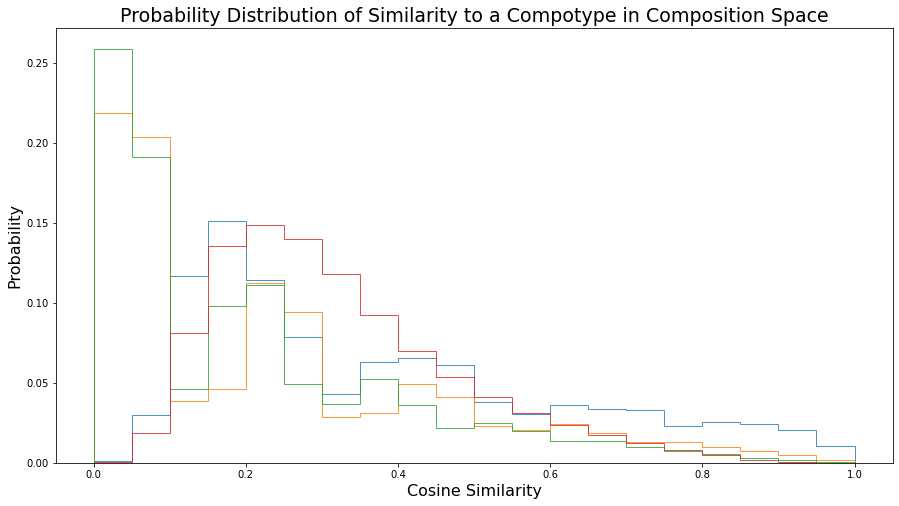

In [15]:
repertoires = [8,12,16,20]
plot_type = 'hist'  # 'rank' or 'hist'
bins_num = 15

# def plot_loghist(x, bins):
#     hist, bins = np.histogram(x, bins=bins)
#     logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#     plt.hist(x, bins=logbins)
#     plt.xscale('log')

if plot_type == 'hist':
    plt.figure(figsize=(15,8))
    for x in repertoires:
        h_similarities_list = similarity_scores_db_dict[x][0]
        plt.hist(h_similarities_list, bins=array(range(21))/20, histtype='step', label = 'Repertoire Size = ' + str(x), alpha=0.8, weights=np.ones(len(h_similarities_list)) / len(h_similarities_list))#,log=True)
    plt.xlabel('Cosine Similarity',fontsize=16)
    plt.ylabel('Probability',fontsize=16)
    plt.title('Probability Distribution of Similarity to a Compotype in Composition Space', fontsize=19)
#     plt.legend()
    

# h_similarities_list = sorted(similarity_scores)

# if plot_type == 'rank':
#     plt.figure(figsize=(15,8))
#     sns.scatterplot(range(len(h_similarities_list)),h_similarities_list, s=15, color='purple')
#     plt.ylim(-0.05,1.05)
#     plt.xlabel('Composition Rank',fontsize=16)
#     plt.ylabel('Cosine Similarity',fontsize=16)
#     plt.title('Similarity to a Compotype in Composition Space, Ng=' + str(Ng) + ', micelle size=' + str(composition_length), fontsize=19)
#     reproducer_number = (100*sum([1 for x in h_similarities_list if x >= 0.9]))/len(h_similarities_list)
#     print('Reproducer probability: ' + str(reproducer_number) + '%')
#     plt.axhline(y=0.9, color='firebrick', linestyle='--')

# elif plot_type == 'hist':
#     plt.figure(figsize=(15,8))
#     plt.hist(h_similarities_list, density=True, bins=array(range(21))/20)
# #     plt.ylim(-0.05,1.05)
#     plt.xlabel('Cosine Similarity',fontsize=16)
#     plt.ylabel('Density',fontsize=16)
#     plt.title('Similarity to a Compotype in Composition Space, Ng=' + str(Ng) + ', micelle size=' + str(composition_length), fontsize=19)
#     reproducer_number = (100*sum([1 for x in h_similarities_list if x >= 0.9]))/len(h_similarities_list)
#     print('Reproducer probability: ' + str(reproducer_number) + '%')

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[0.025, 0.07500000000000001, 0.125, 0.17500000000000002, 0.225, 0.275, 0.32500000000000007, 0.375, 0.42500000000000004, 0.475, 0.525, 0.5750000000000001, 0.625, 0.675, 0.7250000000000001, 0.775, 0.8250000000000001, 0.875, 0.925, 0.9750000000000001]


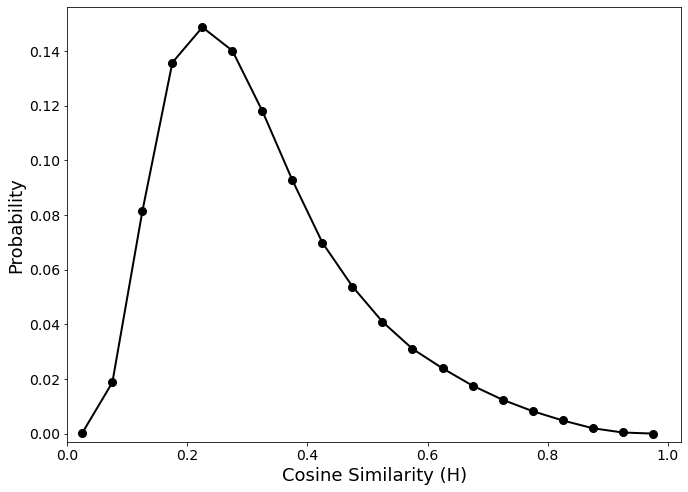

In [30]:
repertoires = [20]
bins_num = 20

plt.figure(figsize=(11,8))
for x in repertoires:
    bins_seq = np.linspace(0,1,bins_num+1)
    h_similarities_list = similarity_scores_db_dict[x][0]
    hist, bins = np.histogram(h_similarities_list, bins=bins_seq, weights=np.ones(len(h_similarities_list)) / len(h_similarities_list))
    print(bins)
    bins = list(bins)
    bins = [np.mean([x,bins[x_idx+1]]) for x_idx, x in enumerate(bins) if x_idx != len(bins)-1]
    print(bins)
    plt.plot(bins,hist, '-o', label = x, color='k', markersize=8, linewidth=2)
plt.xlabel('Cosine Similarity (H)',fontsize=18)
plt.ylabel('Probability',fontsize=18)
# plt.title('Probability Distribution of Similarity to a Compotype in Composition Space', fontsize=19)
plt.ylim(bottom=-0.003)
plt.xlim(left=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
if len(repertoires) > 1:
    plt.legend()
plt.savefig("Compotype Similarity Distribution.pdf")